In [2]:
import torch
import torch.nn as nn

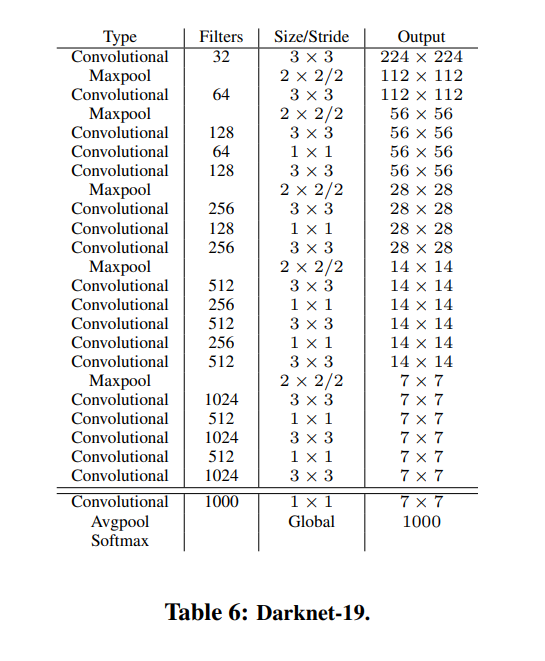

In [3]:
from collections import OrderedDict

In [55]:
class Darknet19(torch.nn.Module):
    def __init__(self, device=None, dtype=None, num_classes=1000, act='Leaky'):
        super().__init__()

        if act == 'Leaky':
            self.act = nn.LeakyReLU(0.1)
        elif act == 'SiLU':
            self.act = nn.SiLU()
        else:
            raise Exception("Invalid activation function.")
        
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.seq1 = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv2d(3, out_channels=32, kernel_size=(3,3),
                                stride=1, padding=1, device=device, 
                                dtype=dtype)),
            ('bn1', nn.BatchNorm2d(32, device=device, dtype=dtype)),
            ('act1', self.act)]))

        self.seq2 = nn.Sequential(OrderedDict([
            ('conv2', nn.Conv2d(32, out_channels=64, kernel_size=(3,3),
                                stride=1, padding=1, device=device, 
                                dtype=dtype)),
            ('bn2', nn.BatchNorm2d(64, device=device, dtype=dtype)),
            ('act2', self.act)]))
        
        self.seq3 = nn.Sequential(OrderedDict([
            ('conv3', nn.Conv2d(64, out_channels=128, kernel_size=(3,3),
                                stride=1, padding=1, device=device, 
                                dtype=dtype)),
            ('bn3', nn.BatchNorm2d(128, device=device, dtype=dtype)),
            ('act3', self.act),
            ('conv4', nn.Conv2d(128, out_channels=64, kernel_size=(1,1),
                                stride=1, padding=0, device=device, 
                                dtype=dtype)),
            ('bn4', nn.BatchNorm2d(64, device=device, dtype=dtype)),
            ('act4', self.act),                      
            ('conv5', nn.Conv2d(64, out_channels=128, kernel_size=(3,3),
                                stride=1, padding=1, device=device, 
                                dtype=dtype)),
            ('bn5', nn.BatchNorm2d(128, device=device, dtype=dtype)),
            ('act5', self.act)]))

        self.seq4 = nn.Sequential(OrderedDict([
            ('conv6', nn.Conv2d(128, out_channels=256, kernel_size=(3,3),
                                stride=1, padding=1, device=device, 
                                dtype=dtype)),
            ('bn6', nn.BatchNorm2d(256, device=device, dtype=dtype)),
            ('act6', self.act),
            ('conv7', nn.Conv2d(256, out_channels=128, kernel_size=(1,1),
                                stride=1, padding=0, device=device, 
                                dtype=dtype)),
            ('bn7', nn.BatchNorm2d(128, device=device, dtype=dtype)),
            ('act7', self.act),                      
            ('conv8', nn.Conv2d(128, out_channels=256, kernel_size=(3,3),
                                stride=1, padding=1, device=device, 
                                dtype=dtype)),
            ('bn8', nn.BatchNorm2d(256, device=device, dtype=dtype)),
            ('act8', self.act)]))

        self.seq5 = nn.Sequential(OrderedDict([
            ('conv9', nn.Conv2d(256, out_channels=512, kernel_size=(3,3),
                                stride=1, padding=1, device=device, 
                                dtype=dtype)),
            ('bn9', nn.BatchNorm2d(512, device=device, dtype=dtype)),
            ('act9', self.act),
            ('conv10', nn.Conv2d(512, out_channels=256, kernel_size=(1,1),
                                stride=1, padding=0, device=device, 
                                dtype=dtype)),
            ('bn10', nn.BatchNorm2d(256, device=device, dtype=dtype)),
            ('act10', self.act),                      
            ('conv11', nn.Conv2d(256, out_channels=512, kernel_size=(3,3),
                                stride=1, padding=1, device=device, 
                                dtype=dtype)),
            ('bn11', nn.BatchNorm2d(512, device=device, dtype=dtype)),
            ('act11', self.act),
            ('conv12', nn.Conv2d(512, out_channels=256, kernel_size=(1,1),
                                stride=1, padding=0, device=device, 
                                dtype=dtype)),
            ('bn12', nn.BatchNorm2d(256, device=device, dtype=dtype)),
            ('act12', self.act),                      
            ('conv13', nn.Conv2d(256, out_channels=512, kernel_size=(3,3),
                                stride=1, padding=1, device=device, 
                                dtype=dtype)),
            ('bn13', nn.BatchNorm2d(512, device=device, dtype=dtype)),
            ('act13', self.act)]))

        self.seq6 = nn.Sequential(OrderedDict([
            ('conv9', nn.Conv2d(512, out_channels=1024, kernel_size=(3,3),
                                stride=1, padding=1, device=device, 
                                dtype=dtype)),
            ('bn9', nn.BatchNorm2d(1024, device=device, dtype=dtype)),
            ('act9', self.act),
            ('conv10', nn.Conv2d(1024, out_channels=512, kernel_size=(1,1),
                                stride=1, padding=0, device=device, 
                                dtype=dtype)),
            ('bn10', nn.BatchNorm2d(512, device=device, dtype=dtype)),
            ('act10', self.act),                      
            ('conv11', nn.Conv2d(512, out_channels=1024, kernel_size=(3,3),
                                stride=1, padding=1, device=device, 
                                dtype=dtype)),
            ('bn11', nn.BatchNorm2d(1024, device=device, dtype=dtype)),
            ('act11', self.act),
            ('conv12', nn.Conv2d(1024, out_channels=512, kernel_size=(1,1),
                                stride=1, padding=0, device=device, 
                                dtype=dtype)),
            ('bn12', nn.BatchNorm2d(512, device=device, dtype=dtype)),
            ('act12', self.act),                      
            ('conv13', nn.Conv2d(512, out_channels=1024, kernel_size=(3,3),
                                stride=1, padding=1, device=device, 
                                dtype=dtype)),
            ('bn13', nn.BatchNorm2d(1024, device=device, dtype=dtype)),
            ('act13', self.act)
        ]))

        self.conv14 = nn.Conv2d(1024, num_classes, kernel_size=(1, 1), stride=(1, 1))
        self.avg_pool = nn.AvgPool2d(kernel_size=(7,7))
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # 224x224, stride: 0
        out = self.seq1(x)
        out = self.max_pool(out)

        # 112x112, stride: 2
        out = self.seq2(out)
        out = self.max_pool(out)

        # 56x56, stride: 4
        out = self.seq3(out)
        out = self.max_pool(out)

        # 28x28, stride: 8
        out = self.seq4(out)
        out = self.max_pool(out)

        # 14x14, stride: 16
        out = self.seq5(out)
        out = self.max_pool(out)

        # 7x7, stride: 32
        out = self.seq6(out)

        # classification head
        out = self.conv14(out)

        N = out.shape[0]
        C = out.shape[1]
        H = out.shape[2]
        W = out.shape[3]
        
        out = self.avg_pool(out)
        out = out.view(N, C)

        out = self.softmax(out)

        return out

In [56]:
img = torch.randint(0, 1, (1, 3, 224, 224)).to(torch.float32)

In [57]:
darknet19 = Darknet19(num_classes=10)

In [58]:
out = darknet19(img)

In [59]:
out.shape

torch.Size([1, 10])

## Count parameters:

In [60]:
total_params = sum(p.numel() for p in darknet19.parameters())
total_params

19834826

19.8 M

# Performance

Top-1 accuracy on ImageNet: 72.9%
</br>Top-5 accuracy on ImageNet: 91.2% 